# Описание

Данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день
для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
внутри каждой папки есть файл data.csv, где и хранятся данные
Схематично выглядит так:


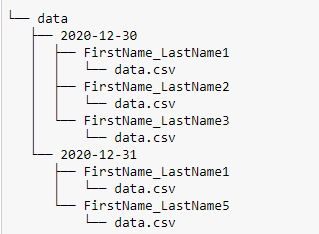



Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.
      

In [3]:
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

1.Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

In [4]:
tree = os.walk('../shared/homeworks/python_ds_miniprojects/4/data')

for item in tree:
    print(item)

('../shared/homeworks/python_ds_miniprojects/4/data', ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'], [])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05', ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'], [])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', [], ['data.csv'])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', [], ['data.csv'])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', [], ['data.csv'])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov', [], ['data.csv'])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov', [], ['data.csv'])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov', [], ['data.csv'])
('../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08', ['Petr_Petrov', 

In [5]:
tree = os.walk('../shared/homeworks/python_ds_miniprojects/4/data')
data_files = []
target_file = 'data.csv'

for item in tree:
    files = item[-1]
    
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0],target_file)
        data_files.append(path)

In [6]:
data_files

['../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Rostislav_Petrov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Kirill_Smirnov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Alexey_Fedorov/data.csv',
 '../shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Anton_Smirnov/data.csv',
 '../shared/homeworks/pyth

In [7]:
data_files_df = [] 

for path in data_files:
            df = pd.read_csv(path, index_col = 0)
            path_fragments = path.split('/') 
            name = path_fragments[7]
            date = path_fragments[6]
            df['name'] = name
            df['date'] = date
            data_files_df.append(df)

In [8]:
data_files_df[0].head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [9]:
data = pd.concat(data_files_df, ignore_index=True)

In [10]:
data

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [11]:
data.quantity.sum()

480

2.Выясните, какой пользователь купил больше всего товаров.

In [12]:
data.groupby('name')\
    .agg({'quantity':'sum'})

,quantity
name,
Alexey_Fedorov,24
Alexey_Ivanov,17
Alexey_Petrov,7
Alexey_Smirnov,52
Anton_Ivanov,23
Anton_Petrov,18
Anton_Smirnov,45
Kirill_Fedorov,28
Kirill_Petrov,9


3.Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:
по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

In [13]:
top_10 = data.groupby('product_id', as_index = False)\
    .agg({'quantity':'sum'})\
    .sort_values('quantity', ascending = False)\
    .head(10)

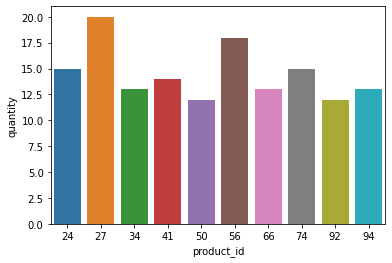

In [14]:
ax = sns.barplot(x="product_id", y="quantity", data=top_10)

4.Посмотрим на продажи по дням! По оси x будут дни, по которым у нас есть данные (date). 

In [15]:
days_df = data.groupby('date', as_index = False)\
    .agg({'quantity':'sum'})

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

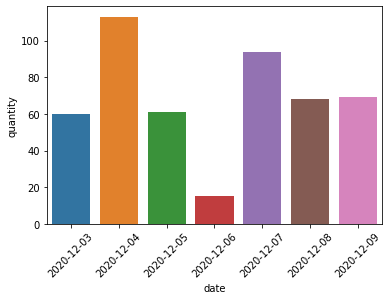

In [16]:
ax = sns.barplot(x="date", y="quantity", data=days_df)
plt.xticks(rotation=45)

5.Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 

In [17]:
df1 = data.drop_duplicates(['name', 'product_id', 'date'])
df1 = df1 \
    .groupby(['name', 'product_id'], as_index=False) \
    .agg({'date': 'nunique'}) \
    .rename(columns = {'date': 'rebuyes'})

In [18]:
df1.rebuyes.nunique()

2